## **[09-860]** Digital Molecular Design Studio
### Studio 1  — February 6th, 2022
#### *An Introduction to Computational Chemistry*

----------------------------------------------------------------------------------------------------------------

In [1]:
# Import our utilities
from utils import *

--------------------------------------------------------------------------------------------------

## Outline for Studio 1

**1. `studio` environment**
> A quick intro to the capabilities our compuational environment on JupyterHub.

**2. The SMILES strings molecular representation (1D)**
> Unfortunately, machines are just starting to learn that humans like to draw them as Lewis structures. Fortunately, we can represent molecules in many ways, including text strings. Let's take a look at the SMILES representation and manipulation with the popular chemoinformatics package `rdkit`. 

**3. Molecules are three-dimensional objects**
> Despite the fact that SMILES representations are so popular and useful, they do not encompass the nuances of the three-dimensional nature of molecules and their structure-energy relationship. Let's explore some tools to quickly transform SMILES strings into `.xyz` files. 

**4. Molecules are three-dimensional _quantum-mechanical_ objects** 
> The fact that molecules are _quantum-mechanical_ objects tells us that we need to think how to evaluate their energies in a _quantum-mechanical_ fashion. Let's dive into our first calculations with `xtb` via `autodE`.

**5. Orbital hybridization information using `NBO 7` linked to `ORCA 5` via `autodE`**
> To design molecules, we need to understand how they will behave in a given environment. For that, we start with one of the most fundamental aspect of chemistry: bonding. More specifically, we explore how to properly evaluate the orbital hybridization involved in chemical bonds using `Natural Bond Orbital (NBO) Analysis`.

--------------------------------------------------------------------------------------------------

### 1. Getting to know the `studio` coding environment:

##### Installed dependencies:

- software:
    - ORCA w/ openmpi and NBO7
- conda:
    - xtb
    - autode
    - crest
- pip:
    - openbabel
    - rdkit
    - cctk
    - morfeus
    - ... among others

    

-----------------------------------------------------------------------------------------------------

### 2. The SMILES string molecular representation

Implicit hydrogens!

In [2]:
water = 'O'
butane = 'CCCC'

Cycles are open and closed using a number

In [3]:
cyclo_butane = 'C1CCC1'

Double and triple bonds are =, and #, respectively

In [4]:
butene = 'C=CCC'
butyne = 'C#CCC'

Aromatic rings are created using lower case c. We can use the kekulized form in some cases

In [5]:
benzene = 'c1ccccc1'
benzene_kekulized = 'C1=CC=CC=C1'

Ramifications go inside ()

In [6]:
Isopropyl_alcohol = 'CC(O)C'

Ions go in []

In [7]:
ammonium = '[NH4+]'

SMILES can encode some stereochemical information

In [8]:
cysteine = 'C(C(C(=O)O)N)S' ### → this is the canonical SMILES version of cysteine
L_cysteine = 'C([C@@H](C(=O)O)N)S'

Now you can combine all to make your favorite molecules!

In [9]:
caffeine = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C' 

Let's use RDKit, a chemoinformatics library, to draw some molecule for us

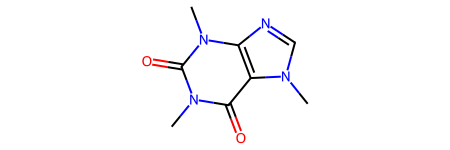

In [10]:
# this will return a RDKit mol object
my_mol = Chem.MolFromSmiles(caffeine)
my_mol

We can use explicit hydrogens

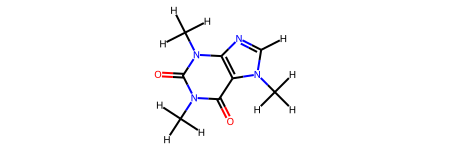

In [11]:
Chem.AddHs(my_mol)

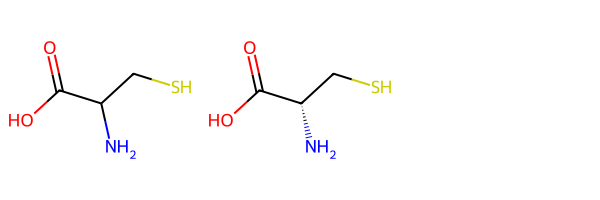

In [12]:
# A quick comparison between canonical and non-canonical SMILES
canonical_cysteine_mol = Chem.MolFromSmiles(cysteine)
L_cysteine_mol = Chem.MolFromSmiles(L_cysteine)

canonical_vs_non_canonical_cysteine_mols_list = [canonical_cysteine_mol, L_cysteine_mol]

Draw.MolsToGridImage(canonical_vs_non_canonical_cysteine_mols_list)

------------------------------------------------------------------------------------------------

### 2. Molecules are three-dimensional objects

#### Anatomy of a XYZ file

1st row is always the # of atoms. After a line break, a cartesian coordinate (`x, y, z`) is assigned to each atom. There is no connectivity information. 

RDKit uses a basic but fast force field to calculate the coordinates. It is called Merck Molecular Force Field, or MMFF for short.

In [13]:
butane = Chem.AddHs(Chem.MolFromSmiles('CCCC'))
Chem.EmbedMolecule(butane)
butane_xyz = Chem.MolToXYZBlock(butane)
print(butane_xyz)

14

C     -1.551010    0.345602   -0.004369
C     -0.541050   -0.542484   -0.678064
C      0.733497   -0.673800    0.122688
C      1.424153    0.623096    0.353392
H     -1.090420    0.887442    0.838944
H     -2.398264   -0.243461    0.451020
H     -2.053686    1.040802   -0.730022
H     -0.370061   -0.218305   -1.709892
H     -0.992187   -1.563087   -0.725780
H      0.428675   -1.075216    1.123882
H      1.404588   -1.421129   -0.333228
H      2.470809    0.383341    0.701304
H      0.968625    1.231270    1.161889
H      1.566329    1.225927   -0.571763



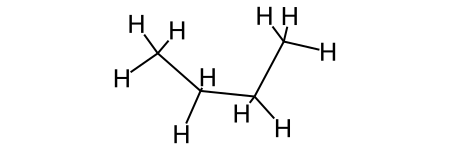

In [14]:
butane

#### Visualizing xyz structures with `py3DMol`

In [15]:
butane_file = Chem.MolToXYZFile(butane, 'butane.xyz') # saving the file

In [16]:
MolTo3DView("butane.xyz")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [17]:
# Cleanup our butane files
os.system("mkdir -p butane")
os.system("mv butane.xyz butane/")

0

-------

### 3. Molecules three-dimensional _quantum-mechanical_ objects 

#### 3.1 Quantum-chemical (semi-empirical) calculations with `xtb` via `autodE`:

In [60]:
# autodE is a python package that was imported when we imported our utilities

# We can load an autodE molecule from the SMILES string and print an XYZ file

morphine = ade.Molecule(
    smiles='CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O', 
    name='morphine')
morphine.print_xyz_file()
MolTo3DView("morphine.xyz")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

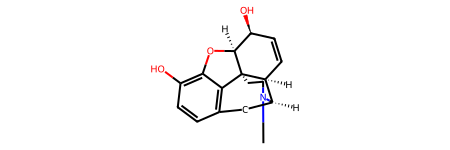

In [61]:
# Similarly we can use RDKit to generate a molecule object from the SMILES string

morphine_rdkit = Chem.MolFromSmiles("CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O")
morphine_rdkit

#### 3.2 Geometry optimization & energy re-evaluation

In [63]:
# With autodE we can perform geometry optimizations and energy 
# calculations with xTB which represents a low level method

morphine.single_point(method=ade.methods.XTB())

morphine_sp_xtb_energy_Ha = morphine.energy
print(f"The electronic energy of morphine calculated at the xTB level of theory is {round(morphine_sp_xtb_energy_Ha, 2)} Ha")

The electronic energy of morphine calculated at the xTB level of theory is -61.18 Ha


In [65]:
# The energy found above was calculated using a geometry optimized
# using a force field method, however, we can use xTB to optimize 
# the geometry and calcluate the energy using this geometry 

morphine.optimise(method=ade.methods.XTB())

morphine_opt_xtb_energy_Ha = morphine.energy
print(f"The electronic energy of morphine calculated at the xTB level of theory is {round(morphine_opt_xtb_energy_Ha, 2)} Ha")
utils.MolTo3DView("morphine_opt_xtb.xyz")

The electronic energy of morphine calculated at the xTB level of theory is -61.25 Ha


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [66]:
# Lets compare the difference in the energies calculated 
# with no xTB optimization - xTB optimized in kcal/mol

delta_E_kcal_mol = (morphine_sp_xtb_energy_Ha - morphine_opt_xtb_energy_Ha)*627.5
print(f"no xTB opt energy - xTB opt energy = {round(delta_E_kcal_mol, 1)} kcal/mol")

no xTB opt energy - xTB opt energy = 43.55 kcal/mol


In [74]:
# Cleanup morphine 

os.system("mkdir -p morphine/")
os.system("mv morphine_* morphine/")
os.system("mv morphine.xyz morphine/")

mv: cannot stat 'morphine_*': No such file or directory


0

-------

### 4. Orbital hybridization information using `NBO 7` linked to `ORCA 5` via `autodE`

#### 4.1 Using Density Functional Theory (DFT) with `ORCA 5` via `autodE`

In [67]:
# We can check to see if the high method (DFT) is available in our coding environment

ade.methods.get_hmethod()

ORCA(available = True)

In [71]:
# We can also see the default keywords

print(f"OPT Keywords: {ade.methods.get_hmethod().keywords.opt}")
print(f"SP Keywords: {ade.methods.get_hmethod().keywords.sp}")
print(f"HESS Keywords: {ade.methods.get_hmethod().keywords.hess}")

OPT Keywords: 'Opt' Functional(pbe0) ResolutionOfIdentity(rijcosx) DispersionCorrection(d3bj) BasisSet(def2-SVP) 'def2/J' EffectiveCorePotential(def2-ECP)
SP Keywords: 'SP' Functional(pbe0) ResolutionOfIdentity(rijcosx) DispersionCorrection(d3bj) BasisSet(def2-TZVP) 'def2/J' EffectiveCorePotential(def2-ECP)
HESS Keywords: 'Freq' Functional(pbe0) ResolutionOfIdentity(rijcosx) DispersionCorrection(d3bj) BasisSet(def2-SVP) 'def2/J' EffectiveCorePotential(def2-ECP)


##### Let's do a quick geometry optimization of L-cysteine with `xtb`

In [75]:
# Define an autode molecule from SMILES of L-isoleucine
# Files related to this molecule will start with the name `L_isoleucine`

name = 'L_isoleucine'
L_isoleucine = ade.Molecule(smiles='CC[C@H](C)[C@@H](C(=O)O)N', name=name)

# Optimize L-isoleucine at xTB level of theory

L_isoleucine.optimise(method=ade.methods.XTB())
print(f"The electronic energy of L-isoleucine at the xTB level of theory is {round(L_isoleucine.energy, 2)} Ha")

# View optimized structure

utils.MolTo3DView(f"{name}_opt_xtb.xyz")

The electronic energy of L-isoleucine at the xTB level of theory is -30.54 Ha


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [76]:
# Cleanup L_isoleucine

os.system("mkdir -p L_isoleucine")
os.system("mv L_isoleucine_* L_isoleucine/")

0

In [25]:
# Define an autode molecule from SMILES for L-cysteine

name = 'L_cysteine'
L_cysteine = ade.Molecule(smiles='C([C@@H](C(=O)O)N)S', name=name)

# optimize L-cysteine at xTB level of theory

L_cysteine.optimise(method=ade.methods.XTB())
print(f"The electronic energy of L-cysteine at the xTB level of theory is {round(L_cysteine.energy, 1)} Ha")

# View optimized structure 

utils.MolTo3DView(f"{name}_opt_xtb.xyz")

The electronic energy of L-cysteine at the xTB level of theory is -24.3 Ha


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [77]:
# Cleanup L_cysteine

os.system("mkdir -p L_cysteine")
os.system("mv L_isoleucine_* L_cysteine/")

mv: cannot stat 'L_isoleucine_*': No such file or directory


256

##### 4.2 Now let's use `ORCA 5` to evaluate the electronic energy of L-cysteine via Density Functional Theory (DFT)

_This calculation is using the default settings from_ `autodE`. 
_That means_ `PBE0` _hybrid functional_, `D3BJ` _Grimme-dispersion correction (with BJ damping)_, `RIJCOSX`,`def2-TZVP` _basis set_, and `def2/J` _as an auxiliary basis set_

In [78]:
# Optimize L-isoleucine at DFT level of theory
# This optimization will produce files that end with `orca` before the file extension

L_isoleucine.single_point(method=ade.methods.ORCA())
print(f"The electronic energy of L-isoleucine at the DFT level of theory is {round(L_isoleucine.energy, 2)} Ha")

The electronic energy of L-isoleucine at the DFT level of theory is -441.37 Ha


In [79]:
# Cleanup L_isoleucine

os.system("mkdir -p L_isoleucine")
os.system("mv L_isoleucine_* L_isoleucine/")

0

##### 4.3 Let's evaluate orbital hybridization information for L-cysteine using `NBO 7` with `ORCA 5` via `autodE`

_For the purposes of this class, we will make a new_ `autodE` + `ORCA` _default for calculating NBO information with a very affordable methodology. We will use_ Grimme's `HF-3c` _method._

>Grimme's 3-corrected Hartree-Fock method (HF-3c) is not a traditional semiempirical method but may be an attractive alternative to the before-mentioned methods. The idea is to correct for some of the systematic deficiencies of a small basis Hartree-Fock calculation (instead of approximating HF) and use as a very fast QM method. This involves correcting for basis set superposition error by the geometric counterpoise scheme (gCP), correcting for dispersion by Grimme's well established D3 approach and a correction for short-range basis incompleteness (9 empirical parameters are used overall). As no integrals are skipped, the HF-3c method will be more costly than a traditional semiempirical method, but the advantage is the results should be much more robust. It's also in many ways a better alternative to a minimal basis DFT method as there is no numerical integration involved. HF-3c has been defined for elements H-Xe with ECPs automatically used for the heavier elements.

In [80]:
# Lets define a set of keywords to run a single point calculation with the HF-3c method
# and calculate NBO on the DFT optimized structure for L-isoleucine

# The HF_3c_nbo_orca will inherit the keywords of the ORCA method

HF_3c_nbo_orca = ade.methods.ORCA()

# We can change the single point calculation keywords and request and NBO calculation

HF_3c_nbo_orca.keywords.sp = ade.SinglePointKeywords(['HF-3c', 'NBO'])

# Rename our molecule to avoid confusion

L_isoleucine.name = "L_isoleucine_HF_3c_NBO"

# Run the single point and NBO calculation

L_isoleucine.single_point(method=HF_3c_nbo_orca)
print(f"The electronic energy of L-isoleucine at the DFT level of theory is {round(L_isoleucine.energy, 2)} Ha")

The electronic energy of L-isoleucine at the DFT level of theory is -436.12 Ha


In [82]:
# Same as before

HF_3c_opt_nbo_orca = ade.methods.ORCA()

# We can change the optimization keywords and request an NBO calculation

HF_3c_opt_nbo_orca.keywords.opt = ade.OptKeywords(['PBE0', 'NBO'])

# Run the optimization and NBO

L_isoleucine.optimise(method=HF_3c_opt_nbo_orca)
print(f"The electronic energy of L-isoleucine at the DFT level of theory is {round(L_isoleucine.energy, 2)} Ha")

The electronic energy of L-isoleucine at the DFT level of theory is -440.86 Ha


In [83]:
# cleanup L_isoleucine_NBO

os.system("mkdir -p L_isoleucine_NBO/")
os.system("mv L_isoleucine_* L_isoleucine_NBO/")

mv: cannot move 'L_isoleucine_NBO' to a subdirectory of itself, 'L_isoleucine_NBO/L_isoleucine_NBO'


256